In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

### Reading in the data

For this analysis we have our data already prepared. `prod_sales` will be a data frame with 1001 columns and 2674 rows. Each row is an owner and the owner number is in the first column. The remaining 1000 columns are the purchases by that owner across the top 1000 products. Let's read the data in and look at the total sales for the top 20 products.

In [2]:
prod_sales = pd.read_csv("owner_level_top_prod_sales.txt",sep="\t")

In [3]:
prod_sales

,owner,Chao Vegan Slices 7oz Field,Tzatziki Dip 8oz Salonica,CocoYo Yogurt 16oz Tulas,Greek-Style Feta Crumbles,DATES Medjool Organic,Grapes Green Organic,Tuna Salad,Vegan Peanut Butter Ball,Red Raspberries 10oz Stahl,...,O.Whole Milk gallon OV,Raw Probiotic for Men 90ct GoL,O.Heritage Flakes 32oz NP,O.WM Bulgarian Yogurt 32oz WMt,CITRUS Lemon Organic,AVOCADO Hass Big FT O.,Yel.Tortilla Chips 16oz LB,PRODUCE,GRAIN Oats Quick Organic,O.Blueberries 4.4oz pkg
0,17516,0.0,0.00,0.0,0.00,3.74,191.86,21.78,0.00,3.79,...,0.0,0.0,6.49,0.0,47.23,0.0,0.00,0.00,0.00,0.00
1,14730,0.0,0.00,0.0,9.04,0.00,0.00,0.00,1.79,5.58,...,0.0,0.0,0.00,0.0,9.05,0.0,0.00,0.00,0.39,6.99
2,11148,0.0,15.76,0.0,3.64,2.41,32.13,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,28.06,0.0,6.48,16.17,0.00,0.00
3,13337,0.0,7.98,0.0,5.59,0.00,0.00,0.00,3.18,3.79,...,0.0,0.0,0.00,0.0,5.07,0.0,5.88,-5.98,0.00,0.00
4,19506,0.0,0.00,0.0,0.00,0.00,37.01,0.00,0.00,0.00,...,0.0,0.0,6.49,0.0,6.83,0.0,0.00,-3.00,0.00,14.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,65151,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
2670,65350,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
2671,55599,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00
2672,65748,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00


In [5]:
product_summary = prod_sales.iloc[:,1:].sum().reset_index()
product_summary = product_summary.rename(columns={"index":"product",0:"total_sales"})
product_summary = product_summary.set_index("product")


In [6]:
product_summary.sort_values(by="total_sales").tail(n=10)

,total_sales
product,
Grass-Fed Ground Beef,42124.88
Grapes Red Organic,43791.31
PACKAGED GROCERY,47413.74
Pepper Bell Red Organic,48208.36
Whole Chicken,48528.11
O.Strawberries 16oz pkg,50820.19
Wedge Cookie,63935.72
AVOCADO Hass Organic,66075.36
ChickenBreastBoneless/Skinless,69960.04


Text(0, 0.5, 'Sales across All Owners')

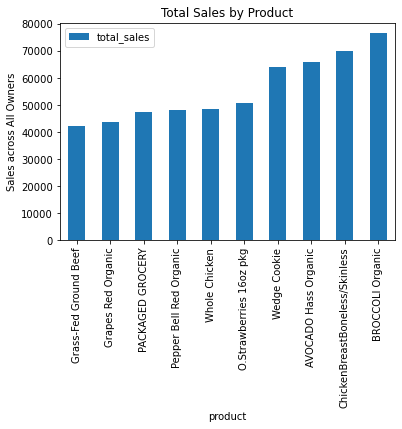

In [7]:
product_summary.sort_values(by='total_sales').tail(n=10).plot(kind="bar")
plt.title("Total Sales by Product")
plt.ylabel("Sales across All Owners")


### PCA on Wedge product sales

These data represent a typical use case for PCA, with our 1000 dimensions of spend data for each owner. Let's fit a PCA model on the product column. We'll use the PCA function from sci-kit learn. You can learn much more about the functionality by reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). 

In [8]:
pca = PCA()

In [9]:
pca.fit(prod_sales.drop(columns="owner"))

PCA()

Typically the first thing we do when working with PCA output is to look at the explained variance. Our PCA object has two variance statistics: `explained_variance_` and `explained_variance_ratio_`. The former is the variance explained by the component in raw terms, the latter normalizes by the total variance of the data set. Let's look at the normalized value for the first 20 components.

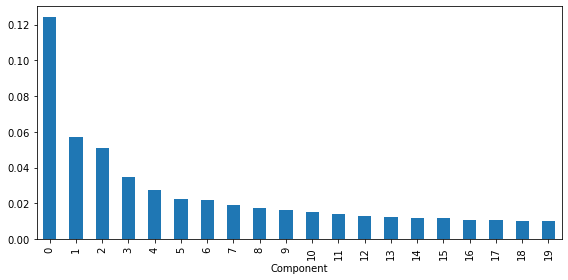

In [16]:
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)
#showing the first value
ax = explained_variance.head(20).plot.bar(legend=False, figsize=(8, 4))
ax.set_xlabel('Component')
plt.tight_layout()
plt.show()

We can see that the first component explains a much larger portion of the variance than any other component. The next two explain more than the fourth. After the fifth component we see 

<AxesSubplot:>

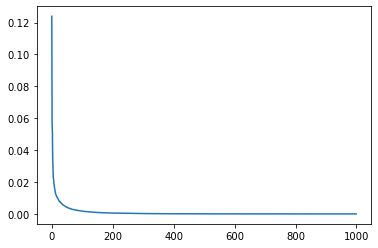

In [12]:
pd.Series(pca.explained_variance_ratio_).plot()

In [12]:
loadings = pd.DataFrame(pca.components_, columns=prod_sales.columns[1:])
print(loadings)

     Chao Vegan Slices 7oz Field  Tzatziki Dip 8oz Salonica  \
0                       0.000264                   0.005878   
1                      -0.000218                  -0.003076   
2                      -0.000068                  -0.001170   
3                       0.000545                  -0.004056   
4                       0.000028                   0.001140   
..                           ...                        ...   
995                     0.014420                   0.000739   
996                    -0.030491                  -0.017047   
997                     0.028191                   0.026852   
998                     0.006930                  -0.003048   
999                    -0.016173                  -0.004406   

     CocoYo Yogurt 16oz Tulas  Greek-Style Feta Crumbles  \
0                    0.006316                   0.006170   
1                   -0.003591                  -0.002866   
2                   -0.001960                  -0.002904   
3  

In [28]:
# descriptive stats on the first 5 components
loadings.transpose().iloc[:,0:5].abs().describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,0.017729,0.007349,0.007556,0.011975,8.458298e-03
std,0.026199,0.030772,0.030722,0.029282,3.048584e-02
min,0.000176,0.000012,0.000003,0.000003,7.479836e-07
25%,0.004716,0.001262,0.001035,0.001476,7.054580e-04
50%,0.009176,0.002870,0.002257,0.004316,2.271052e-03
75%,0.019593,0.006662,0.005731,0.011248,5.964762e-03
max,0.254995,0.915884,0.753813,0.479612,4.395797e-01


In [33]:
loadings.transpose().iloc[:,0].loc[loadings.transpose().iloc[:,0].abs() > 0.075].sort_values()

Grapes Green Organic              0.077038
Brussels Sprouts Organic          0.077185
Salmon Atlantic Fillet            0.077495
Cauliflower Non-Local Organic     0.080202
APPLES Gala Organic               0.083018
Beans Green Organic               0.084234
Asparagus Organic                 0.087257
Grass-Fed Ribeye Steak            0.091586
O.Large Eggs 12ct Larry           0.098826
APPLES Pink Lady Organic          0.100028
Spinach Bulk Organic              0.100199
Kale Dinosaur Organic             0.100199
85% Lean Ground Beef              0.102811
Wedge Cookie                      0.107545
Cucumbers Organic                 0.108081
Squash Zucchini Green Organic     0.110318
Sockeye Salmon                    0.111051
O.EV Olive Oil 25.4oz Napa        0.112511
Banana Organic                    0.115494
Kale Green Organic                0.116918
Fresh Ground Lamb                 0.118279
Salad Mix Organic                 0.126497
CITRUS Lemon Organic              0.140741
Grapes Red 

In [34]:
loadings.transpose().iloc[:,1].loc[loadings.transpose().iloc[:,1].abs() > 0.05].sort_values()

AVOCADO Hass Organic             -0.084005
Fresh Ground Lamb                -0.083635
Grass-Fed Ground Beef            -0.081221
Pepper Bell Red Organic          -0.064730
Kale Green Organic               -0.061274
BROCCOLI Organic                 -0.053069
Sockeye Salmon                   -0.052712
Cucumbers Organic                -0.050740
NUTS Walnuts Halves&Pieces Org   -0.050590
O.Strawberries 16oz pkg          -0.050399
BULK                              0.050386
NUTS Cashews DryRstd.Salted O.    0.058265
Plain Greek Yogurt 24oz Gods      0.078813
REF GROCERY                       0.155240
PACKAGED GROCERY                  0.915884
Name: 1, dtype: float64

In [36]:
loadings.transpose().iloc[:,2].loc[loadings.transpose().iloc[:,2].abs() > 0.06].sort_values().reset_index()

,index,2
0,ChickenBreastBoneless/Skinless,-0.117585
1,NUTS Walnuts Halves&Pieces Org,-0.074931
2,85% Lean Ground Beef,-0.060904
3,Beets Greentop Organic,0.071085
4,Cauliflower Non-Local Organic,0.075813
5,PACKAGED GROCERY,0.079926
6,ONIONS Yellow/Candy O.,0.080364
7,Chard Red/Pink Organic,0.081458
8,Chard Rainbow Organic,0.081993
9,APPLES Gala Organic,0.082347


In [38]:
loadings.transpose().iloc[:,3].loc[loadings.transpose().iloc[:,3].abs() > 0.075].sort_values().reset_index()

,index,3
0,ChickenBreastBoneless/Skinless,-0.479612
1,85% Lean Ground Beef,-0.321600
2,Chicken Wings,-0.247321
3,Grass-Fed Ground Beef,-0.212443
4,Grass-Fed Ribeye Steak,-0.157391
5,Tilapia,-0.116079
6,MEAT,-0.091461
7,O.Whole Milk gallon OV,-0.080671
8,90% Lean Ground Beef,-0.076788
9,Chuck Roast,-0.076775


In [39]:
loadings.transpose().iloc[:,4].loc[loadings.transpose().iloc[:,4].abs() > 0.075].sort_values().reset_index()

,index,4
0,ChickenBreastBoneless/Skinless,-0.147808
1,Kale Green Organic,-0.123485
2,Cucumbers Organic,-0.096681
3,CELERY Organic,-0.089131
4,AVOCADO Hass Organic,-0.077247
5,O.Strawberries 16oz pkg,0.075876
6,Small Soup,0.078971
7,Turkey Loaf,0.087812
8,Salad Mix Organic,0.106339
9,Salmon Atlantic Fillet,0.110617
